# **Báo cáo nhóm 18: Môn Máy học trong bảo mật mạng và hệ thống**


---



**GVHD:** TS. Lê Kim Hùng
---


**Thành viên nhóm 18:**
- Dương Quốc Cường - MSHV: 240202003
- Nguyễn Văn Tùng - MMSHV: 240202017


---



**Cấu trúc chương trình**
---
- Phần 1: Cài đặt và chuẩn bị môi trường
- Phần 2: Đọc dữ liệu
- Phần 3: Xử lý dữ liệu
- Phần 4: Huấn luyện mô hình
- Phần 5: Đánh giá mô hình


---
**Dataset:**
- train.csv
- test.csv


---
**Lưu mô hình huấn luyện (file định dạng pickle)**

- **xgboost_model.pkl:** Đây là tệp chứa mô hình được huấn luyện bằng thuật toán XGBoost
- **label_encoder.pkl:** Tệp này lưu trữ bộ mã hóa nhãn (Label Encoder), thường được sử dụng để chuyển đổi dữ liệu nhãn phân loại (categorical labels) thành các số nguyên.
- **scaler.pkl:** là tệp lưu trữ bộ chuẩn hóa (scaler) đã được huấn luyện trên dữ liệu.

---

- Kiểm thử với **main.py**
- new_test.csv: dùng để kiểm thử


---
**Tệp chứa các thư viện cài đặt**
- requirements.txt




## **Phần 1: Cài đặt và chuẩn bị môi trường**
- Cài đặt các thư viện cần thiết, các thư viện được cài đặt bao gồm:

- pandas, numpy: Xử lý và phân tích dữ liệu.
- scikit-learn: Tiền xử lý dữ liệu và đánh giá mô hình.
- matplotlib, seaborn: Trực quan hóa dữ liệu.
- xgboost: Huấn luyện mô hình XGBoost.
- imbalanced-learn: Cân bằng dữ liệu không cân đối bằng SMOTE.
- tabulate: Tạo bảng kết quả.

In [ ]:
# Cài đặt các thư viện cần thiết
!pip install pandas scikit-learn matplotlib seaborn xgboost imbalanced-learn tabulate

- Import các thư viện phục vụ tiền xử lý dữ liệu, chuẩn hóa, xây dựng và đánh giá mô hình.
- Sử dụng warnings để tắt cảnh báo không cần thiết.

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


**Kết nối Google Drive để truy cập dữ liệu từ các tệp được lưu trong Drive**

In [ ]:
# Kết nối Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Phần 2: Đọc dữ liệu**
- Đọc tệp CSV chứa dữ liệu: Tệp train.csv là dữ liệu huấn luyện, và test.csv là dữ liệu kiểm thử.
- Dữ liệu huấn luyện dùng để đào tạo mô hình, còn dữ liệu kiểm thử dùng để đánh giá hiệu quả của mô hình.

In [ ]:
# Đọc dữ liệu từ file .csv (Tập huấn luyện và tập kiểm thử)
train_data = pd.read_csv('/content/drive/MyDrive/Project_Nhom_18/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Project_Nhom_18/test.csv')


##**Phần 3: Xử lý dữ liệu**


**- Tách đặc trưng và nhãn từ dữ liệu:**
- X_train, X_test: Chứa các đặc trưng đầu vào để dự đoán.
- y_train, y_test: Chứa nhãn (label) của dữ liệu

In [ ]:
# Tách đặc trưng (X) và nhãn (y) từ tập train
X_train = train_data.drop('Label', axis=1)
y_train = train_data['Label']

# Tách đặc trưng (X) và nhãn (y) từ tập test
X_test = test_data.drop('Label', axis=1)
y_test = test_data['Label']

**Mã hóa nhãn (Label Encoding)**

In [ ]:
# Mã hóa nhãn (Label Encoding)
label_encoder = LabelEncoder()

# Mã hóa nhãn trong tập huấn luyện (train)
y_train_encoded = label_encoder.fit_transform(y_train)

# Mã hóa nhãn trong tập kiểm tra (test) bằng cách sử dụng bộ mã hóa đã học từ train
y_test_encoded = label_encoder.transform(y_test)

**- Xử lý giá trị NaN**
; **- Chuẩn hóa dữ liệu**; **- Xử lý mất cân bằng dữ liệu bằng SMOTE**
- Điền các giá trị bị thiếu trong dữ liệu bằng giá trị trung bình (SimpleImputer).
- Chuẩn hóa dữ liệu để các giá trị nằm trong cùng một khoảng, giúp cải thiện hiệu quả mô hình (StandardScaler).
- Sử dụng kỹ thuật SMOTE để cân bằng số lượng dữ liệu của các lớp trong tập huấn luyện

In [ ]:
# Xử lý giá trị NaN
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xử lý mất cân bằng dữ liệu bằng SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_encoded)

##**Phần 4: Huấn luyện mô hình**
**Khởi tạo và huấn luyện XGBoost**
- Tạo mô hình XGBoost để phân loại.
- Huấn luyện mô hình với dữ liệu huấn luyện (x_train, y_train).

**Lưu và xuất ra file huấn luyện mô hình**
- Lưu mô hình đã huấn luyện để sử dụng sau mà không cần huấn luyện lại

In [ ]:
# Khởi tạo và huấn luyện mô hình ban đầu để xác định độ quan trọng của đặc trưng
model_initial = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=12, random_state=42)
model_initial.fit(X_train_smote, y_train_smote)

# Lấy độ quan trọng của các đặc trưng
feature_importances = model_initial.feature_importances_
features = train_data.drop(columns=['Label']).columns

# Tạo DataFrame chứa tên và độ quan trọng của đặc trưng
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
            Feature  Importance
8   fin_flag_number    0.529856
9   syn_flag_number    0.159164
28              UDP    0.059924
46           Weight    0.041572
40              IAT    0.032230
42         Magnitue    0.031005
31             ICMP    0.016202
32              IPv    0.014612
11  psh_flag_number    0.014303
17        fin_count    0.010996
12  ack_flag_number    0.010165
41           Number    0.010041
3     Protocol type    0.009339
37              AVG    0.007983
20             HTTP    0.006792
19        rst_count    0.004899
1     flow_duration    0.004213
2     Header_Length    0.003954
15        ack_count    0.003637
18        urg_count    0.003462
25              SSH    0.002951
36              Max    0.002687
16        syn_count    0.002099
21            HTTPS    0.001751
27              TCP    0.001208
45         Variance    0.001172
35              Min    0.001055
6             Srate    0.000996
4          Duration    0.000983
34          Tot sum



---


**Mục tiêu chính:** Tối ưu hóa tập dữ liệu và cải thiện hiệu quả của mô hình bằng cách giữ lại các đặc trưng quan trọng nhất.


---


**Quy trình**
- Lọc đặc trưng quan trọng dựa trên ngưỡng
- Cập nhật dữ liệu huấn luyện và kiểm thử với các đặc trưng đã lọc.
- Lưu thông tin về độ quan trọng để sử dụng sau.
- Trực quan hóa các đặc trưng quan trọng nhất để hỗ trợ phân tích và báo cáo.


---



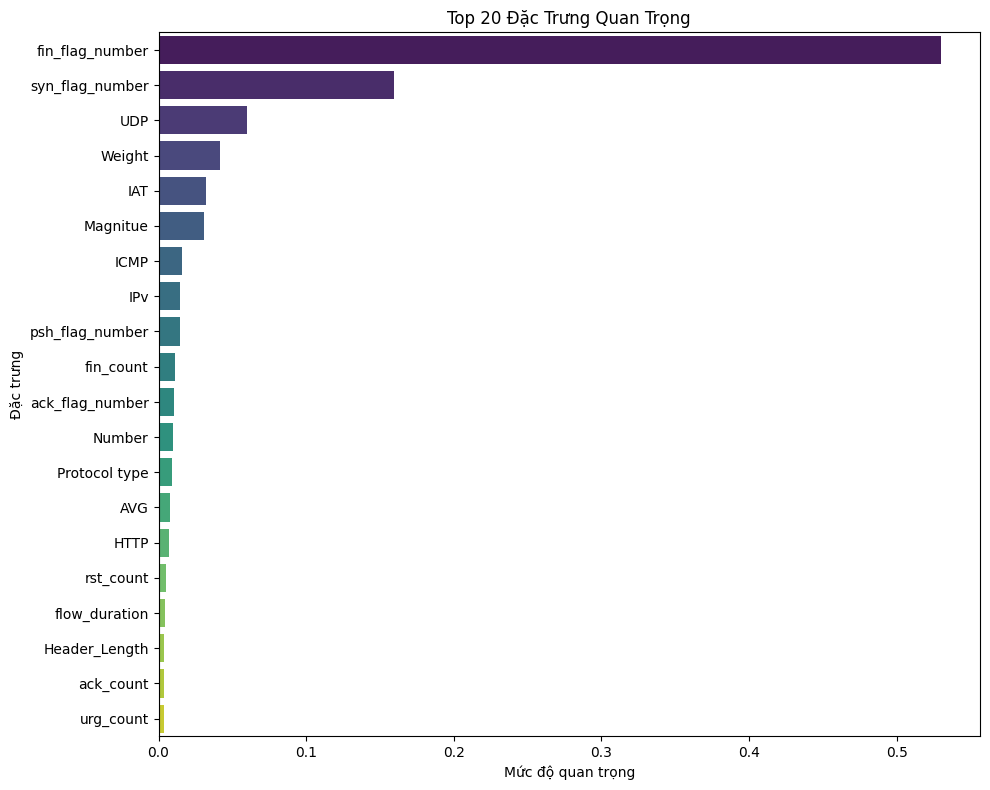

In [ ]:
# Giữ các đặc trưng có độ quan trọng lớn hơn ngưỡng 0.003
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.003]['Feature']
important_features_indices = [train_data.columns.get_loc(f) for f in important_features]
X_train_filtered = X_train_smote[:, important_features_indices]
X_test_filtered = X_test[:, important_features_indices]

# Xuất file CSV lưu thông tin Feature Importance
feature_importance_df.to_csv('/content/drive/MyDrive/Project_Nhom_18/Feature_Importance.csv', index=False)

# Trực quan hóa độ quan trọng của đặc trưng
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:20], palette='viridis')
plt.title("Top 20 Đặc Trưng Quan Trọng")
plt.xlabel("Mức độ quan trọng")
plt.ylabel("Đặc trưng")
plt.tight_layout()
plt.show()

**Tạo một mô hình XGBoost để phân loại dữ liệu sau khi đã chọn các đặc trưng quan trọng và
các tham số được sử dụng:**

- n_estimators=300: Số lượng cây quyết định (decision trees) trong mô hình là 300.
- Mỗi cây được sử dụng để cải thiện kết quả dự đoán.
- learning_rate=0.03: Tốc độ học của mô hình, kiểm soát mức độ ảnh hưởng của mỗi cây trong việc điều chỉnh dự đoán.
- Giá trị nhỏ (0.03) giúp mô hình học từ từ, tránh nhảy qua giá trị tối ưu.
- max_depth=15: Độ sâu tối đa của mỗi cây quyết định.
- Độ sâu lớn (15) giúp mô hình nắm bắt các mối quan hệ phức tạp hơn trong dữ liệu.
- random_state=42: Đảm bảo tính tái lập của kết quả.

In [ ]:
# Huấn luyện mô hình với các đặc trưng đã chọn
model = XGBClassifier(n_estimators=300, learning_rate=0.03, max_depth=15, random_state=42)
model.fit(X_train_filtered, y_train_smote)

print("\nMô hình XGBoost đã được huấn luyện thành công với các đặc trưng đã chọn.")

# Lưu mô hình vào file với định dạng tệp pkl (pickle)
model_path = '/content/drive/MyDrive/Project_Nhom_18/xgboost_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

# Lưu scaler (StandardScaler)
scaler_path = '/content/drive/MyDrive/Project_Nhom_18/scaler.pkl'
with open(scaler_path, 'wb') as file:
    pickle.dump(scaler, file)

# Lưu label encoder (LabelEncoder)
encoder_path = '/content/drive/MyDrive/Project_Nhom_18/label_encoder.pkl'
with open(encoder_path, 'wb') as file:
    pickle.dump(label_encoder, file)

print(f"\nMô hình, Scaler và Label Encoder đã được lưu vào các file pickle.")

# Load lại mô hình từ file với định dạng pickle
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

# Load lại scaler và label encoder
with open(scaler_path, 'rb') as file:
    loaded_scaler = pickle.load(file)

with open(encoder_path, 'rb') as file:
    loaded_encoder = pickle.load(file)

print("\nMô hình đã được load lại thành công.")


Mô hình XGBoost đã được huấn luyện thành công với các đặc trưng đã chọn.

Mô hình, Scaler và Label Encoder đã được lưu vào các file pickle.

Mô hình đã được load lại thành công.


## **Phần 5: Đánh giá mô hình**
- Sử dụng tập kiểm thử để đánh giá hiệu quả mô hình.
- Tính độ chính xác (accuracy) và hiển thị báo cáo phân loại (classification_report).

**- Dự đoán và đánh giá mô hình**

In [ ]:
# Dự đoán và đánh giá mô hình
y_pred_encoded = loaded_model.predict(X_test_filtered)
y_pred = loaded_encoder.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy của mô hình trên tập test: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy của mô hình trên tập test: 0.90

Classification Report:
                         precision    recall  f1-score   support

       Backdoor_Malware       0.26      0.53      0.35       483
          BenignTraffic       0.78      0.87      0.82     16750
       BrowserHijacking       0.31      0.57      0.40       820
       CommandInjection       0.47      0.54      0.50       759
 DDoS-ACK_Fragmentation       1.00      1.00      1.00     17002
        DDoS-HTTP_Flood       0.79      0.98      0.87      3883
        DDoS-ICMP_Flood       0.92      0.95      0.93     16761
DDoS-ICMP_Fragmentation       1.00      0.93      0.96     17040
      DDoS-PSHACK_Flood       1.00      0.93      0.96     16782
       DDoS-RSTFINFlood       1.00      1.00      1.00     16870
         DDoS-SYN_Flood       0.91      0.72      0.80     16935
         DDoS-SlowLoris       0.70      0.99      0.82      3272
DDoS-SynonymousIP_Flood       1.00      0.93      0.96     16926
         DDoS-TCP_Flood

**Tính Confusion Matrix**
- Vẽ ma trận nhầm lẫn (Confusion Matrix) để phân tích kết quả phân loại. Confusion Matrix là một bảng hiển thị số lượng các dự đoán đúng và sai của mô hình, được phân loại theo từng lớp.
- Trục X (Predicted Label): Nhãn mà mô hình dự đoán.
- Trục Y (True Label): Nhãn thực tế trong tập kiểm thử.
---
**Ô trên đường chéo chính (diagonal):**

- Đại diện cho các dự đoán chính xác (True Positive - TP).
Ví dụ: Backdoor_Malware được dự đoán chính xác 53 lần.

**Ô ngoài đường chéo chính:**

- Đại diện cho các dự đoán sai.
Ví dụ: Backdoor_Malware được dự đoán nhầm thành BenignTraffic 2 lần (ô hàng Backdoor_Malware, cột BenignTraffic).

---
**Thanh màu (Color bar)**
*Thanh màu bên phải biểu thị số lượng mẫu:*
- Màu sáng hơn (gần màu trắng): Số lượng thấp.
- Màu đậm hơn (xanh đậm): Số lượng cao.
*Điều này giúp dễ dàng nhận ra các lớp có nhiều dự đoán hoặc lỗi lớn*

---

**Các chỉ số quan sát được và
hiệu suất tổng thể**
- Đường chéo chính chứa các giá trị TP cao, cho thấy mô hình hoạt động tốt trong việc phân loại nhiều lớp.

**Tuy nhiên, một số lớp như:**

- Backdoor_Malware, BenignTraffic, BrowserHijacking có một số lượng nhỏ nhầm lẫn với các lớp khác.

**Lớp có lỗi dự đoán cao**

- BenignTraffic có số lượng nhầm lẫn với nhiều lớp khác (dòng BenignTraffic chứa nhiều giá trị không nằm trên đường chéo chính).
- Recon-HostDiscovery cũng bị dự đoán nhầm thành các lớp khác như Recon-OSScan.

**Lớp có dự đoán chính xác cao**
- Các lớp như DoS-TCP_Flood, DoS-UDP_Flood, và DDoS-SYN_Flood có TP rất cao (số liệu trên đường chéo chính rất lớn).

- Dựa vào các giá trị TP, FP, FN, TN trong ma trận nhầm lẫn, ta có thể tính các chỉ số như Precision, Recall, F1-Score cho từng lớp.


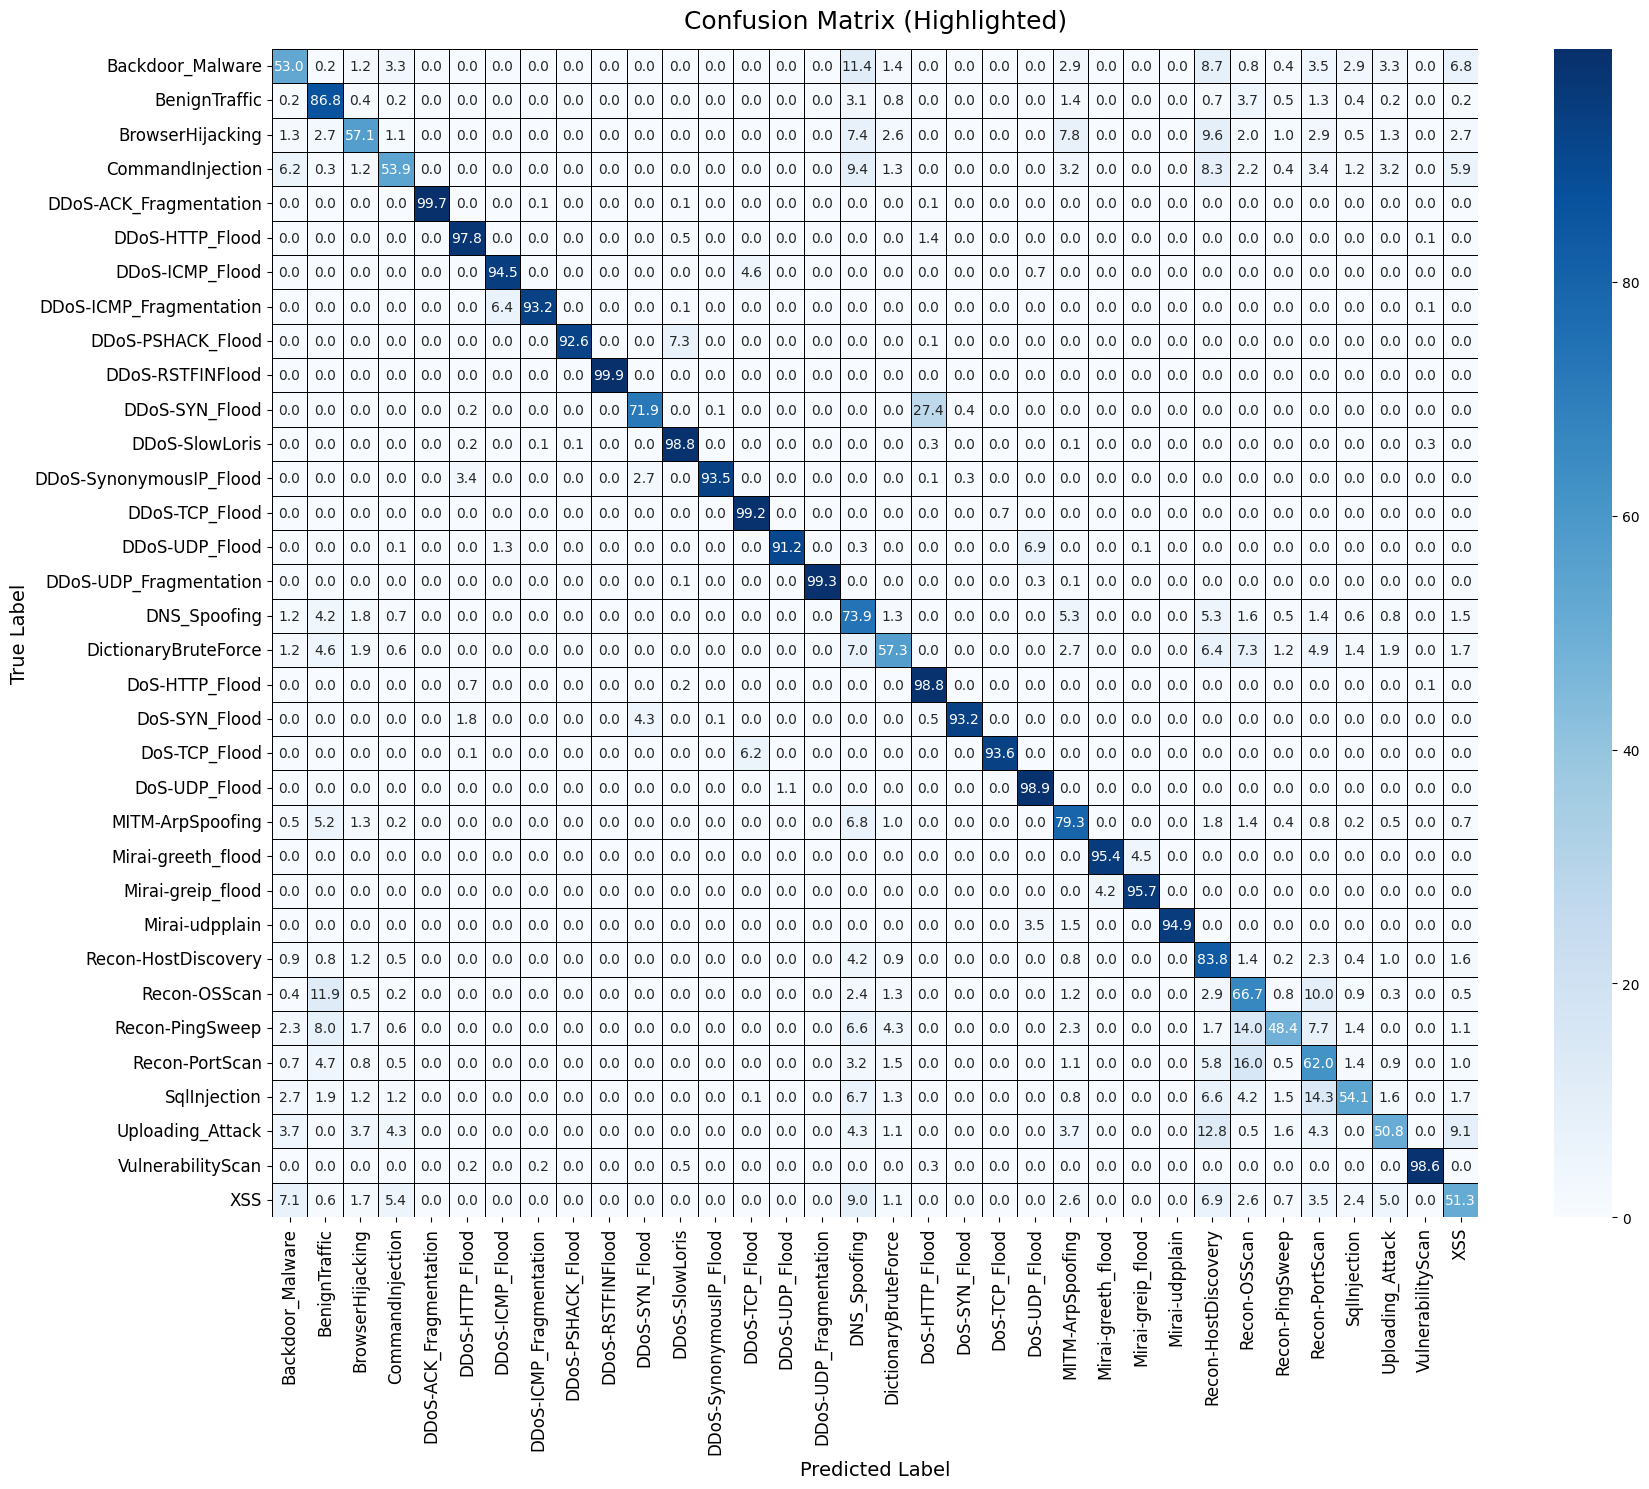

In [ ]:
# Tính Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = loaded_encoder.classes_

# Vẽ Heatmap đơn giản với Highlight
plt.figure(figsize=(18, 15))

# Hiển thị tỷ lệ phần trăm từng ô
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot chính
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", cbar=True,
            xticklabels=labels, yticklabels=labels, linewidths=0.5, linecolor='black')

# Tùy chỉnh tiêu đề và nhãn
plt.title("Confusion Matrix (Highlighted)", fontsize=18, pad=15)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Xoay nhãn trục x để dễ nhìn
plt.yticks(fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Tính các chỉ số TP (True Positive), FP (False Positive), TN (True Negative), và FN (False Negative)**
- TP (True Positive): Số lượng mẫu được dự đoán đúng cho lớp hiện tại.
- FN (False Negative): Số lượng mẫu thuộc lớp hiện tại nhưng bị dự đoán sai.
- FN = Tổng số mẫu thật thuộc lớp hiện tại -  TP.
- FP (False Positive): Số lượng mẫu không thuộc lớp hiện tại nhưng bị dự đoán nhầm là lớp hiện tại.
FP = Tổng số mẫu được dự đoán là lớp hiện tại - TP.
- TN (True Negative): Số lượng mẫu không thuộc lớp hiện tại và cũng không bị dự đoán là lớp hiện tại.
- TN = Tổng số mẫu - (TP + FP + FN).

In [ ]:
# Tính TP, FP, TN, FN cho từng lớp
results = []
for i, label in enumerate(loaded_encoder.classes_):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FN + FP)

    precision = precision_score(y_test, y_pred, average=None, labels=[label])[0]
    recall = recall_score(y_test, y_pred, average=None, labels=[label])[0]
    f1 = f1_score(y_test, y_pred, average=None, labels=[label])[0]

    results.append([label, TP, FP, TN, FN, round(precision, 4), round(recall, 4), round(f1, 4)])

# Chuyển kết quả sang DataFrame
metrics_df = pd.DataFrame(results, columns=['Class', 'TP', 'FP', 'TN', 'FN', 'Precision', 'Recall', 'F1-Score'])

# In kết quả dưới dạng bảng có tiêu đề
print("\nBảng TP, FP, TN, FN, Precision, Recall, F1-Score cho từng lớp:")
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Bảng TP, FP, TN, FN, Precision, Recall, F1-Score cho từng lớp:
╒═════════════════════════╤═══════╤══════╤════════╤══════╤═════════════╤══════════╤════════════╕
│ Class                   │    TP │   FP │     TN │   FN │   Precision │   Recall │   F1-Score │
╞═════════════════════════╪═══════╪══════╪════════╪══════╪═════════════╪══════════╪════════════╡
│ Backdoor_Malware        │   256 │  736 │ 388809 │  227 │      0.2581 │   0.53   │     0.3471 │
├─────────────────────────┼───────┼──────┼────────┼──────┼─────────────┼──────────┼────────────┤
│ BenignTraffic           │ 14547 │ 4082 │ 369196 │ 2203 │      0.7809 │   0.8685 │     0.8224 │
├─────────────────────────┼───────┼──────┼────────┼──────┼─────────────┼──────────┼────────────┤
│ BrowserHijacking        │   468 │ 1038 │ 388170 │  352 │      0.3108 │   0.5707 │     0.4024 │
├─────────────────────────┼───────┼──────┼────────┼──────┼─────────────┼──────────┼────────────┤
│ CommandInjection        │   409 │  469 │ 388800 │  350 │     

**-Trực quan hóa Precision, Recall, F1-Score**
- Precision: Tỷ lệ dự đoán đúng (True Positive) trên tổng số dự đoán là lớp đó.
- Precision cao nghĩa là mô hình ít nhầm lẫn khi dự đoán một lớp cụ thể.
- Recall: Tỷ lệ dự đoán đúng trên tổng số mẫu thực sự thuộc lớp đó.
- F1-Score: Trung bình điều hòa giữa Precision và Recall, dùng để đánh giá sự cân bằng của mô hình.


---
**Phân tích biểu đồ:**
- Trục X: Danh sách các lớp (Class) trong bài toán phân loại.

- Trục Y: Điểm số của các chỉ số (Precision, Recall, F1-Score) trong khoảng từ 0 đến 1.


---



**Các thanh màu:**

- Màu xanh dương (Precision): Thể hiện mức độ chính xác khi mô hình dự đoán lớp đó.
- Màu đỏ (Recall): Thể hiện khả năng mô hình nhận diện đúng các mẫu thuộc lớp đó.
- Màu xám (F1-Score): Tổng hợp giữa Precision và Recall, cho thấy hiệu suất tổng quát.


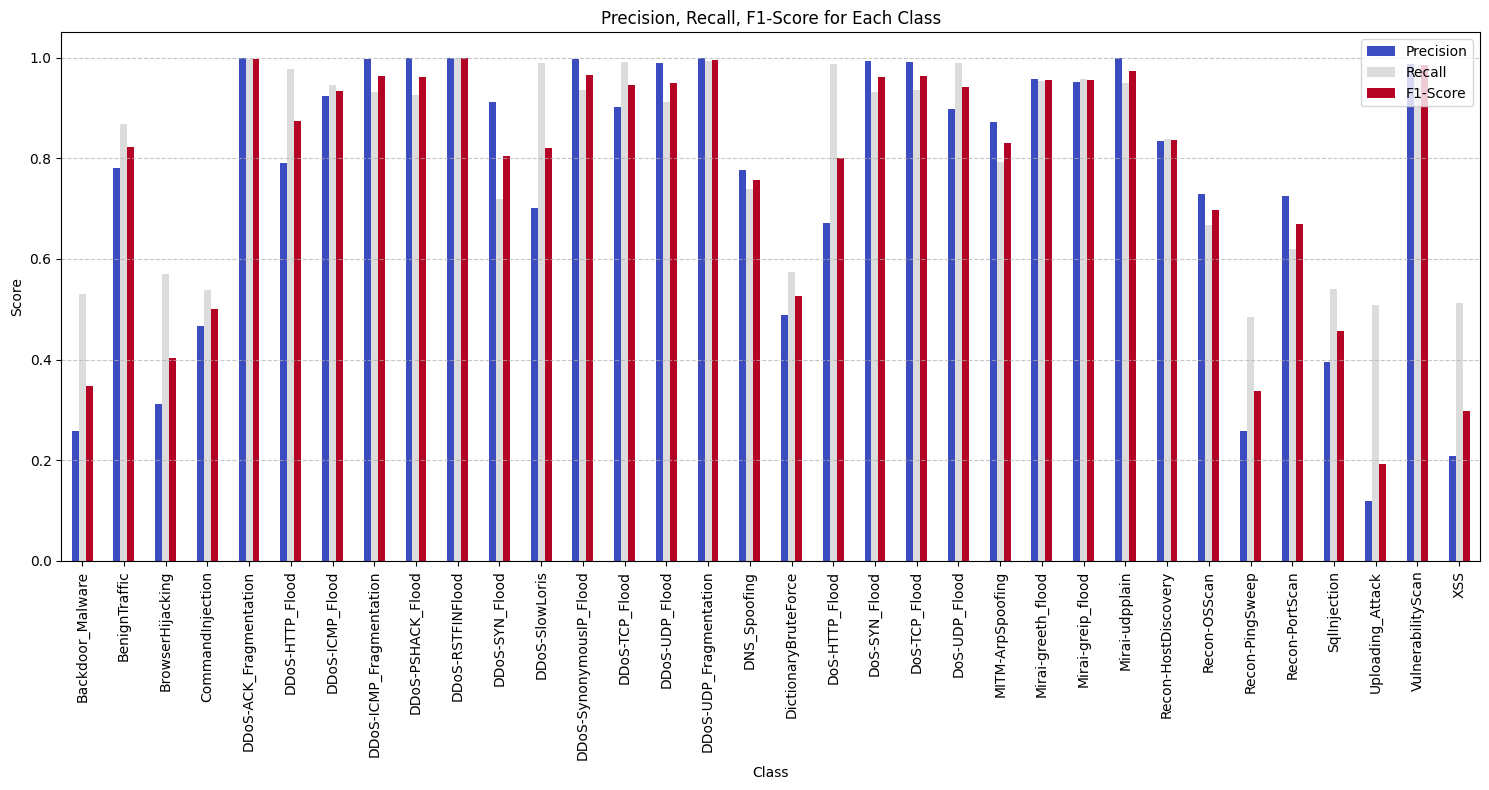

In [ ]:
# Trực quan hóa Precision, Recall, F1-Score
metrics_df.set_index('Class', inplace=True)
metrics_df[['Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(15, 8), colormap='coolwarm')
plt.title('Precision, Recall, F1-Score for Each Class')
plt.ylabel('Score')
plt.xlabel('Class')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Đoạn mã trên được sử dụng để giữ kết nối Colab không bị ngắt tự động.**

In [ ]:
import time
from datetime import datetime

# Chạy chương trình vô hạn để giữ Colab không bị ngắt kết nối
try:
    print("=== Keep Alive Program Started ===")
    while True:
        # Tạm dừng trong 5 phút
        time.sleep(300)
        # In thông báo thời gian để giả lập hoạt động
        print(f"Keep Alive: Colab vẫn đang hoạt động... ({datetime.now()})")
except KeyboardInterrupt:
    print("Keep Alive Program Stopped!")

=== Keep Alive Program Started ===
Keep Alive: Colab vẫn đang hoạt động... (2025-01-06 07:06:58.945943)
Keep Alive: Colab vẫn đang hoạt động... (2025-01-06 07:11:59.035975)
Keep Alive: Colab vẫn đang hoạt động... (2025-01-06 07:16:59.135521)
Keep Alive: Colab vẫn đang hoạt động... (2025-01-06 07:21:59.235881)
Keep Alive: Colab vẫn đang hoạt động... (2025-01-06 07:26:59.333634)
Keep Alive: Colab vẫn đang hoạt động... (2025-01-06 07:31:59.433522)
Keep Alive: Colab vẫn đang hoạt động... (2025-01-06 07:36:59.500680)
Keep Alive: Colab vẫn đang hoạt động... (2025-01-06 07:41:59.600840)
Keep Alive: Colab vẫn đang hoạt động... (2025-01-06 07:46:59.700532)
Keep Alive: Colab vẫn đang hoạt động... (2025-01-06 07:51:59.800589)
Keep Alive: Colab vẫn đang hoạt động... (2025-01-06 07:56:59.900932)
Keep Alive: Colab vẫn đang hoạt động... (2025-01-06 08:01:59.956649)
Keep Alive: Colab vẫn đang hoạt động... (2025-01-06 08:07:00.056532)
Keep Alive: Colab vẫn đang hoạt động... (2025-01-06 08:12:00.156963)